In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "gray",
    "grid.linestyle": "dashed",
    'grid.linewidth': '0.5',
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes',unicode_minus=False)

sns.set(rc=rc)

# 기하학적으로 보는 행렬식의 의미 

* 2x2 행렬의 행렬식은 기저 벡터가 이루는 평면 공간이 얼마나 변하는지를 나타냅니다. 이 행렬식은 두 기저 벡터가 행렬과 선형 결합되어 평행사변형을 형성할 때, 그 평행사변형의 넓이에 대한 정보를 제공합니다.

* 행렬의 행렬식이 양수인 경우, 기저 벡터가 행렬과 선형 결합하여 형성되는 평행사변형의 넓이는 양의 값입니다. 이는 기저 벡터들이 행렬에 의해 확대 또는 축소되거나 회전되었음을 의미합니다. 따라서, 평행사변형의 넓이가 양수인 경우, 기저 벡터들은 행렬에 의해 변형되어 더 크거나 작은 평행사변형을 이루게 됩니다.

* 반대로, 행렬의 행렬식이 음수인 경우, 기저 벡터들이 행렬과 선형 결합하여 형성되는 평행사변형의 넓이는 음의 값입니다. 이는 기저 벡터들이 행렬에 의해 대칭 변환되거나 뒤집혔음을 의미합니다. 따라서, 평행사변형의 넓이가 음수인 경우, 기저 벡터들은 행렬에 의해 뒤집힌 형태로 변형되어 반대 방향의 평행사변형을 이루게 됩니다.

* 행렬식은 행렬이 선형 변환을 표현하는 중요한 개념 중 하나이며, 기저 벡터와 선형 결합으로 이루어지는 평행사변형의 넓이를 통해 행렬의 성질과 변환 특성을 이해하는 데 도움을 줍니다.

In [126]:
A = np.array([[3, 2], [1, 5]])

display(A)

array([[3, 2],
       [1, 5]])

Text(0.5, 1.0, '선형 변환 전 기저벡터가 이루는 평면 공간')

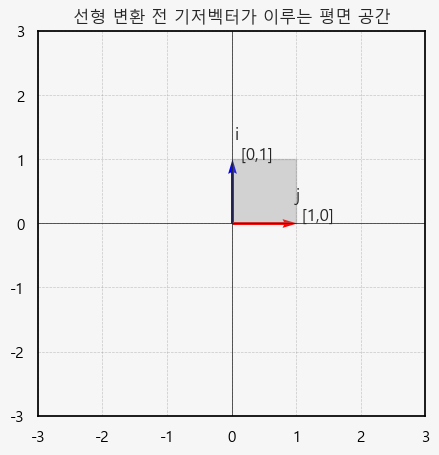

In [134]:
plt.figure(figsize = (5,5))

plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)


plt.xlim([-3,3])
plt.ylim([-3,3])

plt.quiver(0,0,0,1, angles = 'xy', scale_units = 'xy', scale = 1, color = 'blue')
plt.quiver(0,0,1,0, angles = 'xy', scale_units = 'xy', scale = 1, color = 'red')

plt.text(0.05,1,'i \n [0,1]')
plt.text(1,0.05,'j \n [1,0]')

vertices = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
plt.fill(vertices[:, 0], vertices[:, 1], color='gray', alpha=0.3)
plt.title('선형 변환 전 기저벡터가 이루는 평면 공간')

Text(0.5, 0.98, '선형 변환 후 벡터들이 이루는 평면 공간')

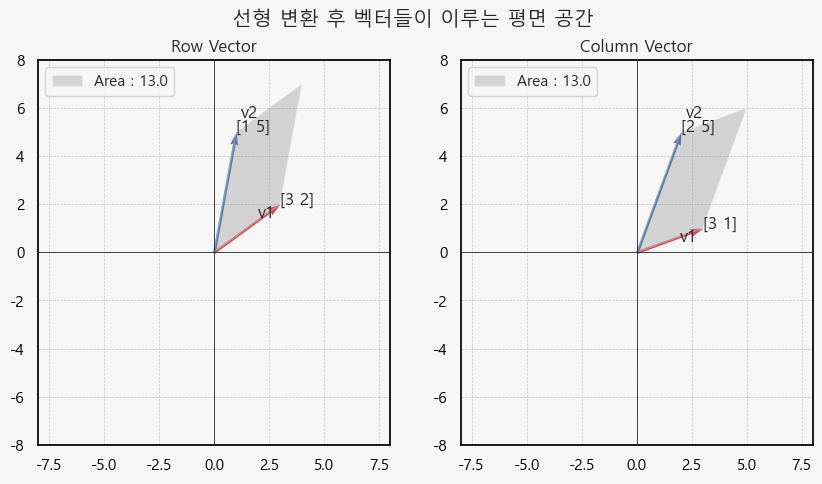

In [128]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))

row_vector = (A[:,0], A[:,1])
col_vector = (A[0,:], A[1,:])

names = ['Row Vector','Column Vector']

area = np.linalg.det(A)

for i,vectors in enumerate([col_vector,row_vector]):
    
    v1,v2 = vectors[0], vectors[1]
    
    # 원점에서 시작하는 벡터 그리기
    ax[i].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
    ax[i].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b')

    # 축 범위 설정
    ax[i].set_xlim(-8, 8)
    ax[i].set_ylim(-8, 8)

    # 축 표시
    ax[i].axhline(0, color='black', linewidth=0.5)
    ax[i].axvline(0, color='black', linewidth=0.5)

    # 벡터 그리기

    # 벡터 라벨 표시
    ax[i].annotate('v1', (v1[0], v1[1]), textcoords="offset points", xytext=(-10,-10), ha='center')
    ax[i].annotate('v2', (v2[0], v2[1]), textcoords="offset points", xytext=(10,10), ha='center')

    # 위치 좌표 표시
    
    ax[i].text(v1[0], v1[1], f'{v1}')
    ax[i].text(v2[0], v2[1], f'{v2}')
    
    # 벡터 공간 표시
    ax[i].fill([0, v1[0], v1[0]+v2[0], v2[0]], [0, v1[1], v1[1]+v2[1], v2[1]], 'gray', alpha=0.3, 
                label = f'Area : {area}')

    ax[i].set_title(names[i])
    ax[i].legend(loc = 'upper left')    
        
fig.suptitle('선형 변환 후 벡터들이 이루는 평면 공간')

# 행렬식이 0일 때 역행렬을 가질 수 없는 이유 

* 행렬식은 기저 벡터가 행렬과 선형 결합하여 형성되는 평행 사변형의 넓이를 의미한다. 즉 기저벡터가 행렬들과 선형 결합하였을 때 얼만큼의 변화가 있었는지를 알 수 있다. 
* 만약 행렬식이 0이라는 것의 의미는 무엇일까 

In [114]:
# 두 벡터가 독립적이지 않고 종속적인 벡터 두개를 담은 행렬 B 생성 
B = np.array([[1,2],[2,4]]) 

display(B)

array([[1, 2],
       [2, 4]])

Text(0.5, 0.98, 'transformed plane')

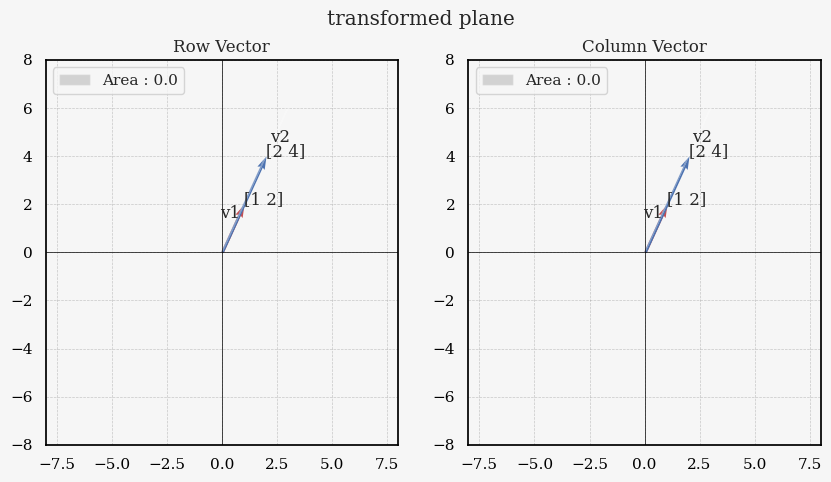

In [115]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))


row_vector = (B[:,0], B[:,1])
col_vector = (B[0,:], B[1,:])

names = ['Row Vector','Column Vector']

area = np.linalg.det(A)

for i,vectors in enumerate([col_vector,row_vector]):
    
    v1,v2 = vectors[0], vectors[1]
    
    # 원점에서 시작하는 벡터 그리기
    ax[i].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
    ax[i].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b')

    # 축 범위 설정
    ax[i].set_xlim(-8, 8)
    ax[i].set_ylim(-8, 8)

    # 축 표시
    ax[i].axhline(0, color='black', linewidth=0.5)
    ax[i].axvline(0, color='black', linewidth=0.5)

    # 벡터 그리기

    # 벡터 라벨 표시
    ax[i].annotate('v1', (v1[0], v1[1]), textcoords="offset points", xytext=(-10,-10), ha='center')
    ax[i].annotate('v2', (v2[0], v2[1]), textcoords="offset points", xytext=(10,10), ha='center')

    # 위치 좌표 표시
    
    ax[i].text(v1[0], v1[1], f'{v1}')
    ax[i].text(v2[0], v2[1], f'{v2}')
    
    # 벡터 공간 표시
    ax[i].fill([0, v1[0], v1[0]+v2[0], v2[0]], [0, v1[1], v1[1]+v2[1], v2[1]], 'gray', alpha=0.3, 
                label = f'Area : {area}')

    ax[i].set_title(names[i])
    ax[i].legend(loc = 'upper left')    
        
fig.suptitle('transformed plane')

 * 종속적인 두 벡터로 선형변환을 하게 되면 1차원에 선에 겹쳐져 그리게 된다.

 * 즉 2차원의 행렬이 1차원의 벡터로 변환이 되게 된다. 

 * 역행렬이란 어떤 행열곱을 하였을 때 항등 행렬을 가지게 되는 경우를 의미하는데 1차원 벡터는 행렬을 이룰 수 없어 역행렬을 가질 수 없다. 